In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import datetime
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('C:/Users/hantao/Desktop/data analysis project/Springboard_Project/Capstone1_Project/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 41 columns):
Unnamed: 0                        119390 non-null int64
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 no

In [4]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reservation_status_date,Date_time,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,2015-07-01,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,2015-07-01,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,2015-07-02,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,2015-07-02,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,2015-07-03,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"


In [5]:
df['arrival_date_month']=df['arrival_date_month'].apply(lambda x: datetime.datetime.strptime(x, "%B"))

In [6]:
df['arrival_date_month']=pd.DatetimeIndex(df['arrival_date_month']).month

In [7]:
df=df.drop('Date_time',axis=1)

In [8]:
df['reservation_status_year']=pd.DatetimeIndex(df['reservation_status_date']).year
df['reservation_status_month']=pd.DatetimeIndex(df['reservation_status_date']).month
df['reservation_status_day']=pd.DatetimeIndex(df['reservation_status_date']).day

In [9]:
df=df.drop('reservation_status_date',axis=1)

In [10]:
df=df.drop('Unnamed: 0',axis=1)

In [11]:
df=df.drop('reservation_status',axis=1)

In [12]:
y=df['is_canceled']
x=df.loc[:,df.columns!='is_canceled']

In [13]:
features=['Conditions','hotel','meal','country','market_segment',
          'distribution_channel','reserved_room_type','assigned_room_type',
          'deposit_type','customer_type']

In [14]:
x=pd.get_dummies(x,columns=features)

In [15]:
xlr,xtestlr,ylr,ytestlr=train_test_split(x,y)

In [16]:
dt=DecisionTreeClassifier()
dt.fit(xlr,ylr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
fi_col=[]
fi=[]
for i,column in enumerate(x):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
fi_df=zip(fi_col,fi) 
fi_df=pd.DataFrame(fi_df,columns=['features','feature importance'])

In [18]:
fi_df.sort_values('feature importance',ascending=False).reset_index()

,index,features,feature importance
0,253,deposit_type_Non Refund,0.229588
1,27,reservation_status_month,0.089964
2,3,arrival_date_week_number,0.082853
3,223,market_segment_Online TA,0.061125
4,28,reservation_status_day,0.057438
...,...,...,...
254,135,country_LBY,0.000000
255,136,country_LCA,0.000000
256,137,country_LIE,0.000000
257,138,country_LKA,0.000000


In [19]:
feature_to_keep=fi_df[fi_df['feature importance']!=0]
feature_to_keep

,features,feature importance
0,lead_time,0.054193
1,arrival_date_year,0.023983
2,arrival_date_month,0.041465
3,arrival_date_week_number,0.082853
4,arrival_date_day_of_month,0.022514
...,...,...
254,deposit_type_Refundable,0.000112
255,customer_type_Contract,0.000472
256,customer_type_Group,0.000204
257,customer_type_Transient,0.005654


In [20]:
fi_name=feature_to_keep['features'].unique()

In [21]:
fi_list=[]
for i in fi_name:
    fi_list.append(i)

In [23]:
x=x[fi_list]


,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015,7,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,737,2015,7,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,7,2015,7,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,13,2015,7,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,14,2015,7,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,53,2016,11,47,13,2,4,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119386,118,2016,11,47,13,2,4,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119387,12,2016,11,47,13,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119388,39,2016,11,47,13,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
xlr,xtestlr,ylr,ytestlr=train_test_split(x,y)

In [36]:
dt=DecisionTreeClassifier()
model=dt.fit(xlr,ylr)

In [37]:
yscore1=model.predict_proba(xtestlr)[:,1]

In [38]:
fpr1, tpr1, threshold1 = roc_curve(ytestlr, yscore1)

In [55]:
print('roc_auc_score for Decision Tree: ', roc_auc_score(ytestlr, yscore1))

roc_auc_score for Decision Tree:  0.9375642120794574


In [41]:
lr=LogisticRegression()
lrmodel=lr.fit(xlr,ylr)

C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
yscore2=lrmodel.predict_proba(xtestlr)[:,1]
fpr2, tpr2, threshold1 = roc_curve(ytestlr, yscore2)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(ytestlr, yscore2))

roc_auc_score for Logistic Regression:  0.9706430751772792


In [57]:
rf=RandomForestClassifier()
rfmodel=rf.fit(xlr,ylr)
yscore3=rfmodel.predict_proba(xtestlr)[:,1]
fpr3, tpr3, threshold1 = roc_curve(ytestlr, yscore3)
print('roc_auc_score for Random Forest: ', roc_auc_score(ytestlr, yscore2))

C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


roc_auc_score for Random Forest:  0.9706430751772792


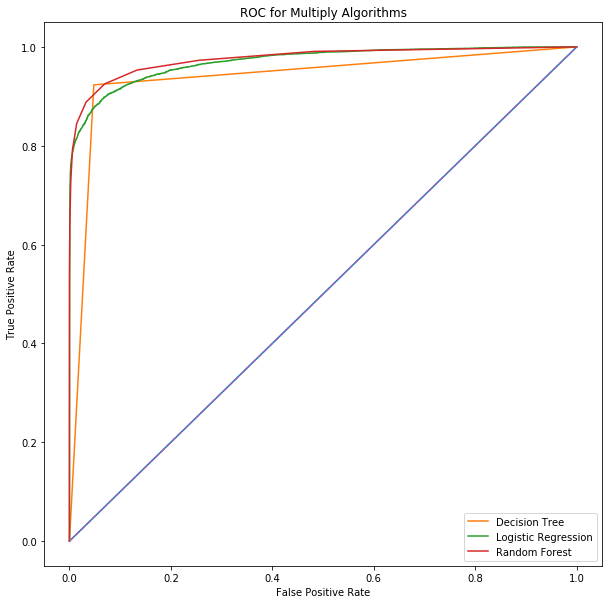

In [58]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1])
plt.title('ROC for Multiply Algorithms')
plt.plot(fpr1, tpr1,label='Decision Tree')
plt.plot(fpr2, tpr2,label='Logistic Regression')
plt.plot(fpr3, tpr3,label='Random Forest')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()